# Portfolio with the Maximum Sortino Ratio for the Private Banks Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'BANDHANBNK.NS','FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS' ]
#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("private_banks.csv")

In [2]:
df = pd.read_csv("private_banks.csv", index_col=0)

In [3]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2017-01-02   583.347229    222.009171    713.249390   442.843628   
2017-01-03   579.838745    224.168030    710.206055   450.261475   
2017-01-04   577.694580    221.260193    694.091003   448.135010   
2017-01-05   578.035645    226.679337    697.433716   453.030762   
2017-01-06   581.666138    227.472397    715.294983   450.212036   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS      CUB.NS  \
Date                                                                  
2017-01-02    1064.019165      63.415531      58.841454  105.809662   
2017-01-03    1076.885864      63.511551      58.793064  107.971535   
2017-01-04    1076.445679      63.127495      57.970448  107.155746   
2017-01-05    1103.255249      64.807701      58.696285  110.174217   
2017-01-06    1119.399658      64.519653      58.696285  113.233467   

            RBLBANK.NS  
Date                    
2017-01-02  329.115204  
2017-01-03  334.505707  
2017-01-04  338.671112  
2017-01-05  346.903931  
2017-01-06  349.403168

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2017-01-03    -0.006033      0.009677     -0.004276     0.016612   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734   
2017-01-05     0.000590      0.024197      0.004804     0.010865   
2017-01-06     0.006261      0.003492      0.025288    -0.006241   
2017-01-09     0.001298      0.002128     -0.010659    -0.005397   
...                 ...           ...           ...          ...   
2021-12-27     0.008236      0.012166      0.014226     0.006942   
2021-12-28     0.006869     -0.000272      0.000817     0.004898   
2021-12-29    -0.004769     -0.000136     -0.006047    -0.007355   
2021-12-30     0.005248      0.000000     -0.005086    -0.002464   
2021-12-31     0.012173      0.006030      0.023006     0.014398   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2017-01-03       0.012020       0.001513      -0.000823  0.020226    0.016246  
2017-01-04      -0.000409      -0.006065      -0.014091 -0.007584    0.012376  
2017-01-05       0.024601       0.026268       0.012443  0.027780    0.024018  
2017-01-06       0.014527      -0.004455       0.000000  0.027389    0.007179  
2017-01-09       0.013199       0.016969       0.020401  0.003955   -0.005062  
...                   ...            ...            ...       ...         ...  
2021-12-27      -0.006875       0.003082      -0.010718 -0.012797   -0.204308  
2021-12-28      -0.003045       0.007968       0.021323  0.023213    0.033144  
2021-12-29       0.020144       0.000610       0.000000  0.020513   -0.009655  
2021-12-30       0.017546       0.003046       0.002107 -0.014242   -0.098990  
2021-12-31       0.003101       0.009685       0.017736 -0.009608   -0.027537  

[1235 rows x 9 columns]

In [5]:
assets = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS' ]
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2017-01-03    -0.006033      0.009677     -0.004276     0.016612   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734   
2017-01-05     0.000590      0.024197      0.004804     0.010865   
2017-01-06     0.006261      0.003492      0.025288    -0.006241   
2017-01-09     0.001298      0.002128     -0.010659    -0.005397   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2017-01-03       0.012020       0.001513      -0.000823  0.020226    0.016246  
2017-01-04      -0.000409      -0.006065      -0.014091 -0.007584    0.012376  
2017-01-05       0.024601       0.026268       0.012443  0.027780    0.024018  
2017-01-06       0.014527      -0.004455       0.000000  0.027389    0.007179  
2017-01-09       0.013199       0.016969       0.020401  0.003955   -0.005062

In [8]:
df_training = df[0:987]
df_training.columns

Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS',
       'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS',
       'RBLBANK.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2020-12-24     0.015472      0.019565      0.020535     0.029520   
2020-12-28     0.011210      0.012674      0.014331     0.012135   
2020-12-29     0.010106      0.016589      0.005215     0.020115   
2020-12-30     0.003707     -0.000095      0.009285    -0.008126   
2020-12-31     0.002649      0.011844     -0.011137    -0.007467   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2020-12-24      -0.002986       0.014678       0.000000 -0.012270   -0.003850  
2020-12-28       0.016456       0.033186       0.028828  0.021375    0.038941  
2020-12-29       0.051645       0.000000      -0.006789 -0.009937    0.016021  
2020-12-30      -0.015288      -0.002228      -0.001363 -0.012000   -0.001290  
2020-12-31      -0.004571      -0.008212       0.010855  0.011167   -0.006256

In [11]:
df_test= df[987:]
df_test.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385   
2021-01-04    -0.006371      0.007931     -0.014396     0.001442   
2021-01-05     0.007528      0.010384     -0.002955     0.061688   
2021-01-06    -0.004320      0.017437      0.005420    -0.015470   
2021-01-07    -0.003032     -0.010296     -0.009177     0.025429   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2021-01-01       0.005794       0.020038       0.009402  0.001941    0.000000  
2021-01-04      -0.002558       0.036079       0.031581 -0.007509    0.036337  
2021-01-05       0.026163       0.024502       0.028099  0.019627    0.045884  
2021-01-06       0.000759       0.005517       0.041930  0.000000    0.051851  
2021-01-07       0.031693       0.039776       0.101003  0.012514    0.019120

In [12]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.102017     0.098984   0.081585             0.824224  0.828590   
1     0.066374     0.063239   0.054071             0.855024  0.733323   
2     0.067324     0.060561   0.048686             0.803923  0.781424   
3     0.084992     0.081102   0.066349             0.818096  0.801360   
4     0.076418     0.070165   0.056516             0.805471  0.804076   
...        ...          ...        ...                  ...       ...   
9995  0.101672     0.095320   0.076976             0.807559  0.856821   
9996  0.075326     0.071043   0.057747             0.812846  0.778763   
9997  0.101003     0.088422   0.072200             0.816543  0.916102   
9998  0.079750     0.071330   0.057630             0.807938  0.837660   
9999  0.116907     0.104290   0.085358             0.818470  0.929211   

      HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  INDUSINDBK.NS  \
0        0.076070      0.206904      0.145819     0.031694       0.106096   
1        0.179632      0.105595      0.006134     0.144540       0.007687   
2        0.104547      0.059553      0.114476     0.042909       0.208050   
3        0.088001      0.155559      0.114348     0.033302       0.139486   
4        0.077241      0.089435      0.147448     0.044774       0.172042   
...           ...           ...           ...          ...            ...   
9995     0.118723      0.157066      0.149801     0.156738       0.005816   
9996     0.139763      0.116827      0.065417     0.194173       0.209740   
9997     0.232848      0.035472      0.151402     0.107339       0.073463   
9998     0.186324      0.054140      0.095111     0.147657       0.031699   
9999     0.121540      0.093485      0.259574     0.012526       0.033519   

      FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
0          0.070073       0.201079  0.088189    0.074076  
1          0.128006       0.188549  0.174095    0.065761  
2          0.003055       0.167534  0.131731    0.168146  
3          0.191635       0.036351  0.071540    0.169777  
4          0.014987       0.160677  0.217769    0.075626  
...             ...            ...       ...         ...  
9995       0.119051       0.093746  0.089020    0.110040  
9996       0.031489       0.074692  0.142318    0.025581  
9997       0.067545       0.087546  0.039524    0.204862  
9998       0.207824       0.006558  0.089190    0.181498  
9999       0.059781       0.023713  0.313909    0.081953  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0  0.102017     0.098984   0.081585             0.824224  0.828590   
1  0.066374     0.063239   0.054071             0.855024  0.733323   
2  0.067324     0.060561   0.048686             0.803923  0.781424   
3  0.084992     0.081102   0.066349             0.818096  0.801360   
4  0.076418     0.070165   0.056516             0.805471  0.804076   

   HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  INDUSINDBK.NS  \
0     0.076070      0.206904      0.145819     0.031694       0.106096   
1     0.179632      0.105595      0.006134     0.144540       0.007687   
2     0.104547      0.059553      0.114476     0.042909       0.208050   
3     0.088001      0.155559      0.114348     0.033302       0.139486   
4     0.077241      0.089435      0.147448     0.044774       0.172042   

   FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
0       0.070073       0.201079  0.088189    0.074076  
1       0.128006       0.188549  0.174095    0.065761  
2       0.003055       0.167534  0.131731    0.168146  
3       0.191635       0.036351  0.071540    0.169777  
4       0.014987       0.160677  0.217769    0.075626

In [13]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2017-01-03    -0.006033      0.009677     -0.004276     0.016612   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734   
2017-01-05     0.000590      0.024197      0.004804     0.010865   
2017-01-06     0.006261      0.003492      0.025288    -0.006241   
2017-01-09     0.001298      0.002128     -0.010659    -0.005397   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2017-01-03       0.012020       0.001513      -0.000823  0.020226    0.016246  
2017-01-04      -0.000409      -0.006065      -0.014091 -0.007584    0.012376  
2017-01-05       0.024601       0.026268       0.012443  0.027780    0.024018  
2017-01-06       0.014527      -0.004455       0.000000  0.027389    0.007179  
2017-01-09       0.013199       0.016969       0.020401  0.003955   -0.005062

In [14]:
df_training = df[0:987]
df_training.columns

Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS',
       'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS',
       'RBLBANK.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385   
2021-01-04    -0.006371      0.007931     -0.014396     0.001442   
2021-01-05     0.007528      0.010384     -0.002955     0.061688   
2021-01-06    -0.004320      0.017437      0.005420    -0.015470   
2021-01-07    -0.003032     -0.010296     -0.009177     0.025429   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2021-01-01       0.005794       0.020038       0.009402  0.001941    0.000000  
2021-01-04      -0.002558       0.036079       0.031581 -0.007509    0.036337  
2021-01-05       0.026163       0.024502       0.028099  0.019627    0.045884  
2021-01-06       0.000759       0.005517       0.041930  0.000000    0.051851  
2021-01-07       0.031693       0.039776       0.101003  0.012514    0.019120

In [17]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.162838
Downside SD            0.142177
Upside SD              0.116944
Volatility Skewness    0.822520
Sortino                1.004645
HDFCBANK.NS            0.236558
ICICIBANK.NS           0.069880
KOTAKBANK.NS           0.354336
AXISBANK.NS            0.014963
INDUSINDBK.NS          0.096128
FEDERALBNK.NS          0.017411
IDFCFIRSTB.NS          0.053872
CUB.NS                 0.141301
RBLBANK.NS             0.015551
Name: 6292, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.004762
Downside SD            0.004601
Upside SD              0.003822
Volatility Skewness    0.830845
Sortino               -3.312171
HDFCBANK.NS            0.006103
ICICIBANK.NS           0.009569
KOTAKBANK.NS           0.004657
AXISBANK.NS            0.167799
INDUSINDBK.NS          0.178261
FEDERALBNK.NS          0.174811
IDFCFIRSTB.NS          0.201103
CUB.NS                 0.056066
RBLBANK.NS             0.201632
Name: 371, dtype: float64

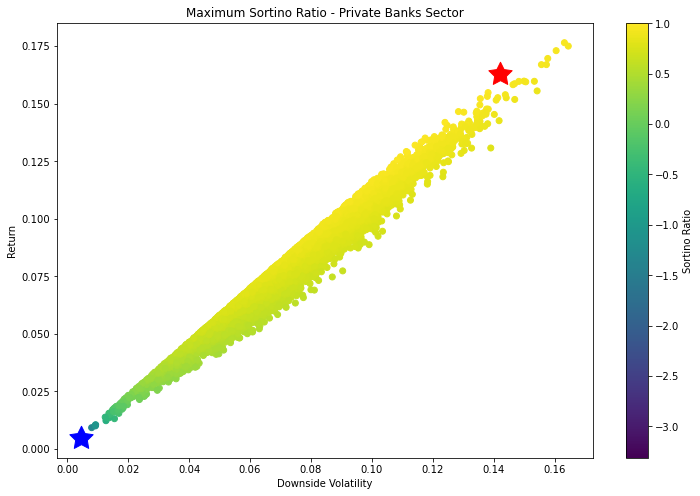

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - Private Banks Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.1734, 0.2590, 0.2504, 0.0703, 0.0186, 0.0525, 0.0394, 0.1267, 0.0098]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS'])
w_1.columns = ['weights']
w_1

[0.1734, 0.259, 0.2504, 0.0703, 0.0186, 0.0525, 0.0394, 0.1267, 0.0098]


weights
HDFCBANK.NS     0.1734
ICICIBANK.NS    0.2590
KOTAKBANK.NS    0.2504
AXISBANK.NS     0.0703
INDUSINDBK.NS   0.0186
FEDERALBNK.NS   0.0525
IDFCFIRSTB.NS   0.0394
CUB.NS          0.1267
RBLBANK.NS      0.0098

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.2366, 0.0699, 0.3543, 0.0150, 0.0961, 0.0174, 0.0539, 0.1413, 0.0156]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS'])
w_2.columns = ['weights']
w_2

weights
HDFCBANK.NS     0.2366
ICICIBANK.NS    0.0699
KOTAKBANK.NS    0.3543
AXISBANK.NS     0.0150
INDUSINDBK.NS   0.0961
FEDERALBNK.NS   0.0174
IDFCFIRSTB.NS   0.0539
CUB.NS          0.1413
RBLBANK.NS      0.0156

In [21]:
w_raw = [0.0042, 0.0109, 0.2991, 0.0363, 0.1444, 0.1433, 0.0191, 0.2927, 0.0499]
w_3 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS'])
w_3.columns = ['weight']
w_3

weight
HDFCBANK.NS    0.0042
ICICIBANK.NS   0.0109
KOTAKBANK.NS   0.2991
AXISBANK.NS    0.0363
INDUSINDBK.NS  0.1444
FEDERALBNK.NS  0.1433
IDFCFIRSTB.NS  0.0191
CUB.NS         0.2927
RBLBANK.NS     0.0499

In [22]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
HDFCBANK.NS          0.1734         0.2366        0.0042
ICICIBANK.NS         0.2590         0.0699        0.0109
KOTAKBANK.NS         0.2504         0.3543        0.2991
AXISBANK.NS          0.0703         0.0150        0.0363
INDUSINDBK.NS        0.0186         0.0961        0.1444
FEDERALBNK.NS        0.0525         0.0174        0.1433
IDFCFIRSTB.NS        0.0394         0.0539        0.0191
CUB.NS               0.1267         0.1413        0.2927
RBLBANK.NS           0.0098         0.0156        0.0499

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

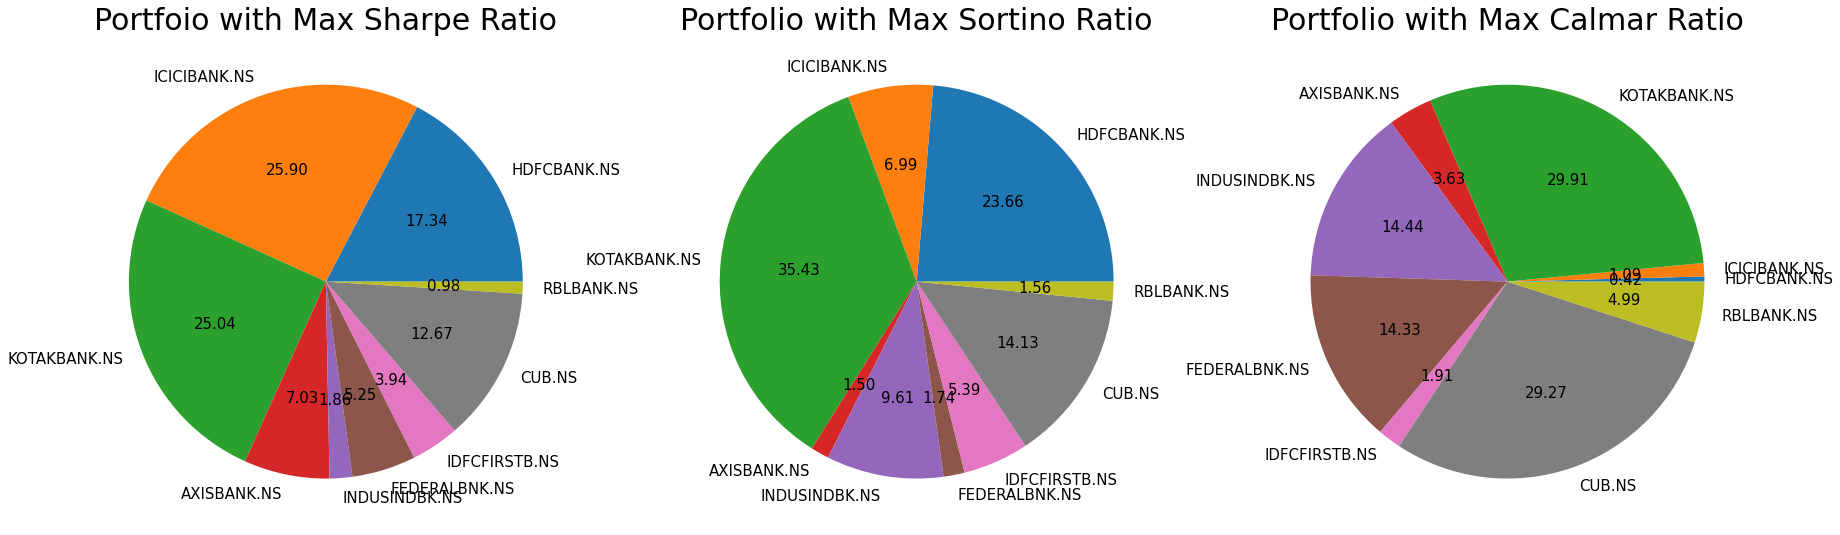

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15})
ax3.set_title('Portfolio with Max Calmar Ratio', fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [25]:
df_training.shape

(987, 9)

In [26]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [27]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.004550                     0.002232   
2017-01-04                   -0.011825                    -0.011775   
2017-01-05                    0.014418                     0.011488   
2017-01-06                    0.011460                     0.015892   
2017-01-09                    0.000120                    -0.000258   
2017-01-10                    0.005077                     0.005468   
2017-01-11                    0.018282                     0.021424   
2017-01-12                    0.000819                    -0.003065   
2017-01-13                    0.006961                     0.005132   
2017-01-16                    0.008378                     0.007756   
2017-01-17                   -0.000948                    -0.002977   
2017-01-18                    0.002147                     0.003047   
2017-01-19                   -0.002540                    -0.004433   
2017-01-20                   -0.011639                    -0.004774   
2017-01-23                    0.001160                     0.009355   
2017-01-24                    0.007243                     0.010417   
2017-01-25                    0.029955                     0.036148   
2017-01-27                    0.013514                     0.001967   
2017-01-30                   -0.015022                    -0.017216   
2017-01-31                   -0.000709                     0.002514   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.008072  
2017-01-04                   -0.009994  
2017-01-05                    0.018981  
2017-01-06                    0.017236  
2017-01-09                    0.002277  
2017-01-10                    0.003480  
2017-01-11                    0.024203  
2017-01-12                   -0.008191  
2017-01-13                    0.012210  
2017-01-16                    0.010080  
2017-01-17                    0.001716  
2017-01-18                    0.002382  
2017-01-19                   -0.004928  
2017-01-20                   -0.000782  
2017-01-23                    0.013338  
2017-01-24                    0.006283  
2017-01-25                    0.032365  
2017-01-27                    0.008298  
2017-01-30                   -0.027457  
2017-01-31                    0.006150

<AxesSubplot:xlabel='Date', ylabel='Return'>

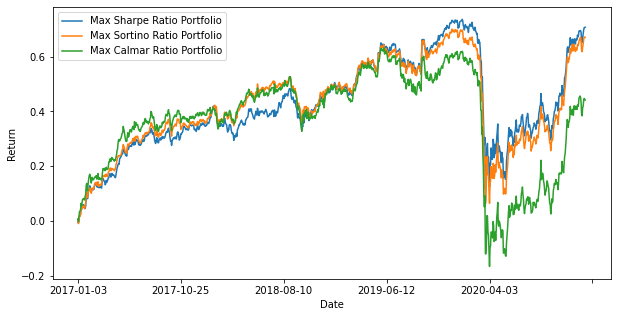

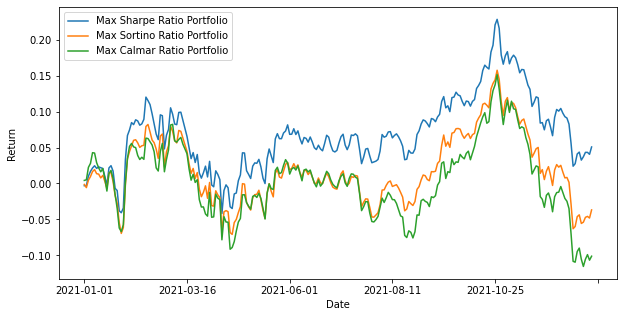

In [28]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [29]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.180764
Max Sortino Ratio Portfolio    0.171257
Max Calmar Ratio Portfolio     0.112804
dtype: float64

In [30]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.051569
Max Sortino Ratio Portfolio   -0.037431
Max Calmar Ratio Portfolio    -0.102870
dtype: float64